In [1]:

import time
import os
import torch.nn.functional as F
import torch
import  torch.nn as nn
from collections import OrderedDict
from torch.autograd import Variable
from torch.utils.data import DataLoader
import numpy as np
from utils import print_params_num, ImagePool, tensor2im, tensor2im_tanh
import draw
import models
from options import vaeSROption
from train_block_vaeSRnet import blindVAE as bvae

from PIL import Image

import math
from torch.autograd import Variable
from torchvision import transforms

import os
import torch
from collections import OrderedDict
from torch.autograd import Variable
import numpy as np
from train_vaeSRnet import blindVAE as vae
import utils
import filters

loss_dict = {'mse':nn.MSELoss, 'l1':nn.L1Loss, 'bce':nn.BCELoss}
channel_of_colormode = {'L':1,'Y':1,'RGB':3}

In [2]:
opt = vaeSROption()
opt.batch_size = 1
opt.param_num = 4
opt.pretrain_model ="/media/library/wcd/Models/Train_deblur/patch_in/condition_p/come10_st960000_block_vaeSR_gsig_3.0_glen_3_mang_90_mlen10_SRIN_block16_PBN_block8.model"
print("---------------------------------------------")
model = bvae(opt,isTrain=False,isSeperate=False,fromPretrain=True)
net=model


---------------------------------------------
------------ Networks initialized -------------
condition_SRNet (
  (resblocks): ModuleList (
    (0): ResidualBlock (
      (conv1): ConvLayer (
        (reflection_pad): ReflectionPad2d (1, 1, 1, 1)
        (conv2d): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
      (conv2): ConvLayer (
        (reflection_pad): ReflectionPad2d (1, 1, 1, 1)
        (conv2d): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
      (relu): ReLU ()
      (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
      (norm2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    )
    (1): ResidualBlock (
      (conv1): ConvLayer (
        (reflection_pad): ReflectionPad2d (1, 1, 1, 1)
        (conv2d): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
      (conv2): ConvLayer (
        (reflection_pad): ReflectionPad2d (1, 1, 1, 1)
        (conv2d): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
    

In [3]:
import numpy
numpy.random.randint(8)
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


def psnr(im1, im2):
    MSE = mse(im1, im2)
    if MSE < 0.00000001:
        psnr = 10000
    else:
        psnr = 20 * np.log10(255) - 10 * np.log10(MSE)
    return psnr

In [ ]:


torch.cuda.set_device(1)
norm_flag = False
make_lr_flag = True

refdir = "/home/wcd/Projects/Pytorch-examples/fast_neural_style/images/banckmark/vae"
lrdir = "/home/wcd/Projects/Pytorch-examples/fast_neural_style/images/style-images/SR"

#/home/wcd/Desktop/to_neural_style/ckpt/non_params
#come18_st2960000_vaeSR_gauss_3.0_mang_89_mlen8_SRIN_block20_PBN_block8.model

#come18_st2960000_block_vaeSR_gsig_3.0_glen_3_mang_89_mlen8_SRIN_block4_PBN_block8.model
#/home/wcd/Desktop/to_fast_neural_style/neural_style/ckpt/block/tanhout/block4
#modelname = 'come18_st1440000_vaeSR_gauss_3.0_mang_89_mlen8_SRIN_block20_PBN_block8.model'
#modeldir = os.path.join("/home/wcd/Desktop/to_neural_style/ckpt/nonactivate_out/block20",modelname)
modeldir = '/home/wcd/Desktop/to_neural_style/ckpt/block/nonactive/come18_st2960000_block_vaeSR_gsig_3.0_glen_3_mang_89_mlen8_SRIN_block4_PBN_block8.model'
#modeldir = '/home/wcd/Desktop/to_neural_style/ckpt/nonactivate_out/come18_st1440000_nop_block_vaeSR_gsig_3.0_glen_3_mang_89_mlen8_SRIN_block4_PBN_block8.model'
netdict = torch.load(modeldir)
opt = vaeSROption()
opt.seperate_model = modeldir
opt.batch_size = 1


net = bvae(opt,isTrain=False,isSeperate=False,fromPretrain=False)
net.load_network(modeldir)

In [ ]:
wimg = net.netSR.encoder.convlist[0].conv2d.weight[:,0,:,:].data.cpu().numpy()
wimg
#print(['mean:',wimg.mean(),'min:',wimg.min(),'max',wimg.max(),'std',wimg.std()])

In [ ]:
wglen = net.netSR.encoder.convlist[0].conv2d.weight[:,1,:,:].data.cpu().numpy()
wglen
#print(['mean:',wgsig.mean(),'min:',wgsig.min(),'max',wgsig.max(),'std',wgsig.std()])

In [ ]:
wglen = net.netSR.encoder.convlist[0].conv2d.weight[:,2,:,:].data.cpu().numpy()
wglen
#print(['mean:',wglen.mean(),'min:',wglen.min(),'max',wglen.max(),'std',wglen.std()])

In [ ]:
wmx = net.netSR.encoder.convlist[0].conv2d.weight[:,3,:,:].data.cpu().numpy()
wmx
#print(['mean:',wmang.mean(),'min:',wmang.min(),'max',wmang.max(),'std',wmang.std()])

In [ ]:
wmy = net.netSR.encoder.convlist[0].conv2d.weight[:,4,:,:].data.cpu().numpy()
wmy
#print(['mean:',wmlen.mean(),'min:',wmlen.min(),'max',wmlen.max(),'std',wmlen.std()])

In [4]:
#test for seperate gauss blur
origimg = Image.open("/home/wcd/Desktop/to_fast_neural_style/images/banckmark/vae/HR/comic.bmp")
#origimg = Image.open("manmade_01_gyro_01.png").convert('L')
#origimg = Image.open("/home/wcd/Desktop/to_fast_neural_style/images/banckmark/vae/comic.bmp").convert('RGB')
nporigimg = np.array(origimg)

w = nporigimg.shape[1]
h = nporigimg.shape[0]
nporigimg.shape

(360, 248)

In [84]:
#test for seperate gauss blur
blurimg = Image.open("input.png").convert('L')
w,h = blurimg.size
blurimg = blurimg.crop((0,0,w-w%4,h-h%4))
origimg = Image.open("res.png").convert('L')
w,h = origimg.size
origimg = origimg.crop((0,0,w-w%4,h-h%4))
#origimg = Image.open("/home/wcd/Desktop/to_fast_neural_style/images/banckmark/vae/comic.bmp").convert('RGB')
nporigimg = np.array(origimg)

w = nporigimg.shape[1]
h = nporigimg.shape[0]
nporigimg.shape

(372, 500)

In [56]:
blurimg.size

(396, 400)

In [ ]:
#nporigimg = nporigimg[:,:,2]
nporigimg=nporigimg[:360,:248]
w = nporigimg.shape[1]
h = nporigimg.shape[0]
[w,h]
h,w = nporigimg.shape
#origimg = Image.fromarray(nporigimg).convert('L')
h,w

In [ ]:
randomcrop=128
h, w = origimg.size
hstart = np.random.randint(0, h-randomcrop+1)
wstart = np.random.randint(0, w-randomcrop+1)

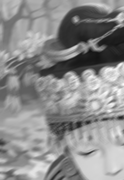

In [6]:

kernel,motion_anchor = filters.motion_kernel_matlab(length=6,angle=30)
blurorigimglu = utils.HR2LR(origimg,motion_anchor=motion_anchor,motion_kernel=kernel)
#blurorigimglu = utils.HR2LR(origimg,gauss=0)
blurorigimglu = Image.fromarray(np.array(blurorigimglu)[:h//2,:w//2])
blurorigimglu

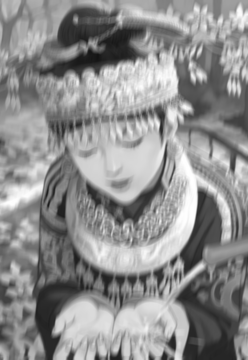

In [7]:
kernel,motion_anchor = filters.motion_kernel_matlab(length=8,angle=80)
a1=utils.HR2LR(origimg,motion_anchor=motion_anchor,motion_kernel=kernel)
a1

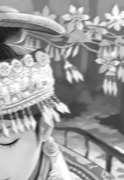

In [8]:

kernel,motion_anchor = filters.motion_kernel_matlab(length=3,angle=10)
blurorigimgru = utils.HR2LR(origimg,motion_anchor=motion_anchor,motion_kernel=kernel)
#blurorigimgru = utils.HR2LR(origimg,gauss=1.5)
blurorigimgru = Image.fromarray(np.array(blurorigimgru)[:h//2,w//2:])
blurorigimgru

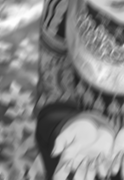

In [9]:
kernel,motion_anchor = filters.motion_kernel_matlab(length=8,angle=60)
blurorigimgld = utils.HR2LR(origimg,motion_anchor=motion_anchor,motion_kernel=kernel)
#blurorigimgld = utils.HR2LR(origimg,gauss=2)
blurorigimgld = Image.fromarray(np.array(blurorigimgld)[h//2:,:w//2])
blurorigimgld

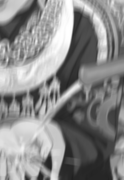

In [10]:
kernel,motion_anchor = filters.motion_kernel_matlab(length=8,angle=80)
blurorigimgrd = utils.HR2LR(origimg,motion_anchor=motion_anchor,motion_kernel=kernel)
#blurorigimgrd = utils.HR2LR(origimg,gauss=3)
blurorigimgrd = Image.fromarray(np.array(blurorigimgrd)[h//2:,w//2:])
blurorigimgrd

In [11]:
def stackimg(lu,ru,ld,rd):
    blur = np.vstack(
        (np.hstack((np.array(lu),np.array(ru))),
         np.hstack((np.array(ld),np.array(rd)))
        ))
    return Image.fromarray(blur)

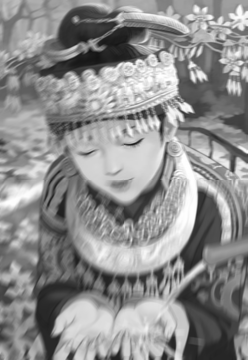

In [12]:
blurIMG = stackimg(blurorigimglu,blurorigimgru,blurorigimgld,blurorigimgrd)
G = blurIMG
blurIMG

In [13]:
blurIMG.size

(248, 360)

In [14]:
# input=>tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [15]:
def input1img(net,blurIMG):
    lrtensor = transform(blurIMG)
    ptensor = torch.stack((lrtensor,lrtensor,lrtensor,lrtensor),1)
    lrtensor=lrtensor.unsqueeze(0)
    lrtensor = (lrtensor-0.5)/0.5
    hrtensor = lrtensor.clone()
    print([hrtensor.size(),lrtensor.size(),ptensor.size()])
    net.set_input([hrtensor,lrtensor,ptensor])
    net.validate()
    sr = net.SR
    sr = sr.cpu().data.squeeze(0).clamp(-1,1)
    sr = (sr+1)/2.0 *255.0
    srIMG = sr.squeeze(0).clone().clamp(0, 255).numpy().astype("uint8")
    srIMG = Image.fromarray(srIMG, 'L')
    #
    return srIMG

In [85]:
lrud1223_sr = input1img(net,blurimg)

[torch.Size([1, 1, 372, 500]), torch.Size([1, 1, 372, 500]), torch.Size([1, 4, 372, 500])]


In [24]:
lrud1223_sep_sr = stackimg(
    input1img(net,blurorigimglu),input1img(net,blurorigimgru),input1img(net,blurorigimgld),input1img(net,blurorigimgrd)
)

[torch.Size([1, 1, 180, 124]), torch.Size([1, 1, 180, 124]), torch.Size([1, 4, 180, 124])]
[torch.Size([1, 1, 180, 124]), torch.Size([1, 1, 180, 124]), torch.Size([1, 4, 180, 124])]
[torch.Size([1, 1, 180, 124]), torch.Size([1, 1, 180, 124]), torch.Size([1, 4, 180, 124])]
[torch.Size([1, 1, 180, 124]), torch.Size([1, 1, 180, 124]), torch.Size([1, 4, 180, 124])]


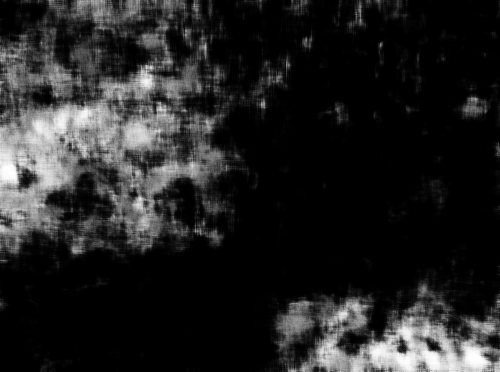

In [86]:
pmap = net.fake_p[0][3][:][:].data.cpu()
pmap = pmap.clamp(0,1)
pmap = pmap*255.0
pmapIMG = pmap.clamp(0, 255).numpy().astype("uint8")
Image.fromarray(pmapIMG, 'L')

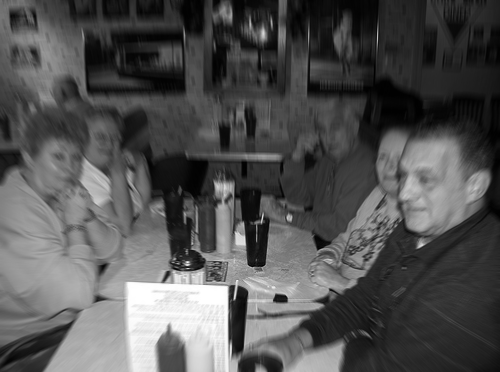

In [87]:
blurimg

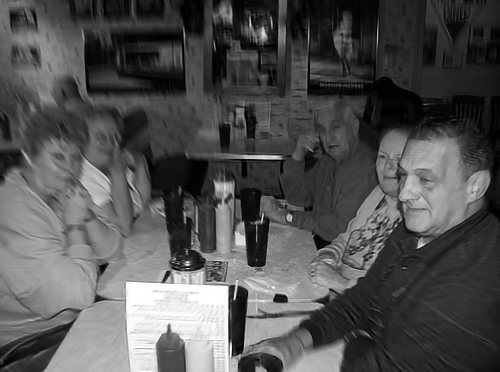

In [88]:
G=lrud1223_sr
lrud1223_sr

[torch.Size([1, 1, 372, 500]), torch.Size([1, 1, 372, 500]), torch.Size([1, 4, 372, 500])]


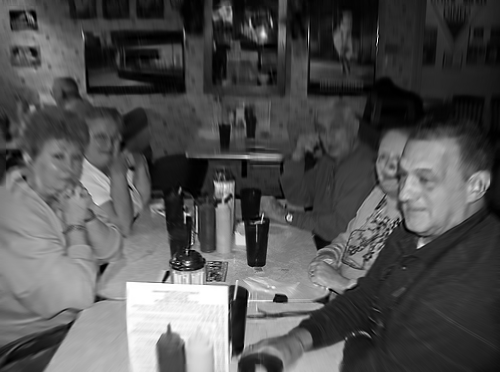

In [49]:
lrud1223_sr = input1img(net,lrud1223_sr)
lrud1223_sr
origimg

In [45]:
print("psnr inc")
[psnr(np.array(lrud1223_sr),np.array(origimg))-psnr(np.array(blurimg),np.array(origimg))]

psnr inc


[-1.2314519876921288]

In [25]:
print("psnr inc")
psnr(np.array(lrud1223_sep_sr),nporigimg)-psnr(np.array(blurIMG),nporigimg)

psnr inc


2.6746191200130305

In [ ]:
b1 = Image.fromarray(np.array(blurimg)[:h//2,:w//2])
b2 = Image.fromarray(np.array(blurimg)[:h//2,w//2:])
b3 = Image.fromarray(np.array(blurimg)[h//2:,:w//2])
b4 = Image.fromarray(np.array(blurimg)[h//2:,w//2:])
sr2 = stackimg(
    input1img(net,b1),input1img(net,b2),input1img(net,b3),input1img(net,b4)
)

In [ ]:
origimg

In [ ]:
lrud2_1to2_4sep_sr

In [ ]:
idx = '0000774'
origtext = Image.open('/home/wcd/LinkToMyLib/Datas/BMVC_large_patches/'+idx+'_orig.png').convert('L')
blurtext = Image.open('/home/wcd/LinkToMyLib/Datas/BMVC_large_patches/'+idx+'_blur.png').convert('L')
kertext = Image.open('/home/wcd/LinkToMyLib/Datas/BMVC_large_patches/'+idx+'_psf.png').convert('L')

In [ ]:

blurtext

In [ ]:
kertext.size

In [ ]:
kertext

In [ ]:
srtext = input1img(net,blurtext)
srtext

In [ ]:
pmap = net.fake_p[0][1][:][:].data.cpu()
pmap = pmap.clamp(0,1)
pmap = pmap*255.0
pmapIMG = pmap.clamp(0, 255).numpy().astype("uint8")
Image.fromarray(pmapIMG, 'L')

In [ ]:
blurtext

In [ ]:
R

In [ ]:

img = Image.merge('RGB', [R,B,G])
img

In [ ]:
img2 = Image.open("/home/wcd/Desktop/to_fast_neural_style/images/banckmark/vae/comic.bmp").convert('RGB')
psnr(np.array(img),np.array(img2)[:360,:248,:])
Image.fromarray(np.array(img2)[:360,:248,:])

In [ ]:
npimg = np.array(nporigimg)
npimg = npimg[:128,:128]

In [ ]:
base_size = 32
block_mul = 2**np.random.randint(scale)
block_size = base_size*block_mul
block_size

In [ ]:
lrtensor[0][0][:10][:10]

In [ ]:
img_size=128
gauss_len_max = 3
gauss_sig_max = 3.0
motion_angle_max = 90
motion_len_max = 9
import filters
import cv2
import math
def HR2LRnp(img,gauss_len=0,gauss_sig=0,motion_angle=0,motion_len=0,scale=None):
    if gauss_sig is not 0:
        # gauss
        img = cv2.GaussianBlur(img,(gauss_len,gauss_len),gauss_sig)
    else:
        # motion
        motion_kernel,motion_anchor = filters.motion_kernel(motion_len,motion_angle)
        if motion_kernel.size>1:
            #print([kernel,anchor])
            img = cv2.filter2D(img,-1, motion_kernel,anchor=motion_anchor)
    return img

In [ ]:
scale = np.random.randint(3)
block_size = 128//(2**scale)
block_num = 2**(2*scale)
print(['scale',scale,'block size',block_size,'block num',block_num])
blur_type = np.random.randint(2)
if not blur_type:
    gauss_len = np.random.rand(block_num)
    gauss_sig = np.random.rand(block_num)
    motion_angle = 0
    motion_len = 0
    gauss_len = (gauss_len*gauss_len_max).astype(np.int)*2+3 #[3,2max+1]
    gauss_sig = (gauss_sig*gauss_sig_max).astype(np.float32) #[0,max)
else:
    gauss_len = 0
    gauss_sig = 0
    motion_angle = np.random.rand(block_num)
    motion_len = np.random.rand(block_num)
    motion_angle = (motion_angle*motion_angle_max).astype(np.int)  #[0,max-1]
    motion_len = (motion_len*motion_len_max).astype(np.int)   #[0,max-1]
if not blur_type:
    print([blur_type,'gauss'])
    print(gauss_sig)
    print(gauss_len)
else:
    print([blur_type,'motion'])
    print(motion_len)
    print(motion_angle)
    

In [ ]:
newImg = np.zeros((img_size,img_size),dtype=np.uint8)
params = np.zeros((4,img_size,img_size),dtype=np.float32) #sig,len, x,y
for b in range(block_num):
    row = b//2**scale
    col = b%2**scale
    index_x = col * block_size
    index_y = row * block_size
    if not blur_type:
        newImg[index_y:index_y+block_size,index_x:index_x+block_size]=HR2LRnp(npimg,gauss_len[b],gauss_sig[b],0,0)[index_y:index_y+block_size,index_x:index_x+block_size]
        params[0,index_y:index_y+block_size,index_x:index_x+block_size]=np.full((block_size,block_size), gauss_sig[b]/(gauss_sig_max))
        params[1,index_y:index_y+block_size,index_x:index_x+block_size]=np.full((block_size,block_size), gauss_len[b]/(2*gauss_len_max+1))
        print([blur_type,'gauss',gauss_sig[b],gauss_len[b],gauss_sig[b]/(gauss_sig_max),gauss_len[b]/(2*gauss_len_max+1)])
    else:
        newImg[index_y:index_y+block_size,index_x:index_x+block_size]=HR2LRnp(npimg,0,0,motion_angle[b],motion_len[b])[index_y:index_y+block_size,index_x:index_x+block_size]
        m_x=motion_len[b]*math.cos(math.radians(motion_angle[b]))
        m_y=motion_len[b]*math.sin(math.radians(motion_angle[b]))
        params[2,index_y:index_y+block_size,index_x:index_x+block_size]=np.full((block_size,block_size), m_x/(motion_len_max-1))
        params[3,index_y:index_y+block_size,index_x:index_x+block_size]=np.full((block_size,block_size), m_y/(motion_len_max-1))
        print([blur_type,'motion',motion_angle[b],motion_len[b],m_x/(motion_len_max-1),m_y/(motion_len_max-1)])


In [ ]:
Image.fromarray(newImg)

In [ ]:
Image.fromarray((params[0]*255).astype(np.uint8))

In [ ]:
Image.fromarray((params[1]*255).astype(np.uint8))

In [ ]:
Image.fromarray((params[2]*255).astype(np.uint8))

In [ ]:
Image.fromarray((params[3]*255).astype(np.uint8))

In [ ]:
np.ascontiguousarray(params)

In [ ]:
params[0,index_x:index_x+block_size//2,index_y:index_y+block_size].shape